# Extracción

## Instalación

In [1]:
!pip install adversarial-robustness-toolbox==1.4.1

     |████████████████████████████████| 768kB 8.8MB/s 
     |████████████████████████████████| 235kB 13.5MB/s 
     |████████████████████████████████| 21.0MB 69.8MB/s 
     |████████████████████████████████| 7.1MB 47.9MB/s 
     |████████████████████████████████| 747kB 53.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from art.utils import load_mnist

In [3]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

## Cargar datos

In [5]:
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

In [6]:
print("x_train shape:", x_train.shape)
print("y_train shape:", x_train.shape)
print("x_test shape:", x_train.shape)
print("y_test shape:", x_train.shape)

print("min_pixel_value:", min_pixel_value)
print("min_pixel_value:", max_pixel_value)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 28, 28, 1)
x_test shape: (60000, 28, 28, 1)
y_test shape: (60000, 28, 28, 1)
min_pixel_value: 0.0
min_pixel_value: 1.0


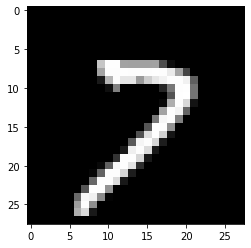

In [7]:
sample = 567
plt.imshow(x_train[sample].reshape((28, 28)), cmap='gray', interpolation='none')

## Entrenar modelo

In [8]:
from art.estimators.classification import KerasClassifier

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

victim = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)

victim.fit(x_train, y_train, batch_size=128, nb_epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
468/468 [==============================] - 3s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.2160 - accuracy: 0.9340
Epoch 2/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0584 - accuracy: 0.9826
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0429 - accuracy: 0.9866
Epoch 4/10
468/468 [==============================] - 2s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0341 - accuracy: 0.9897
Epoch 5/10
468/468 [==============================] - 2s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0274 - accuracy: 0.9910
Epoch 6/10
468/468 [==============================] - 3s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0244 - accuracy: 0.9921
Epoch 7/10
468/468 [==============================] - 3s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.021

In [10]:
predictions_test = victim.predict(x_test)
accuracy = np.sum(np.argmax(predictions_test, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test examples: {}%".format(accuracy * 100))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Accuracy on test examples: 99.13%


# Defensas

In [11]:
from art.defences.postprocessor import Rounded, GaussianNoise

In [12]:
from art.attacks.extraction import CopycatCNN, KnockoffNets

In [13]:
preds = victim.predict(x_test)
print(preds)
postprocessor_rounded = Rounded(decimals=4)
post_preds = postprocessor_rounded(preds=preds)
print(post_preds)

[[1.09123495e-10 1.33214528e-09 3.18478435e-08 ... 9.99998689e-01
  1.15470655e-09 7.45873905e-08]
 [7.79219622e-09 1.14264997e-08 1.00000000e+00 ... 6.24902013e-14
  1.71393086e-08 1.36162544e-12]
 [1.31142372e-07 9.99970198e-01 3.53800047e-08 ... 1.44307678e-05
  2.03286982e-06 1.26029356e-08]
 ...
 [1.22817276e-16 3.34324799e-12 5.60647923e-14 ... 1.11069140e-10
  2.61510110e-07 6.29302332e-10]
 [6.26432239e-11 1.60962281e-13 6.32045956e-13 ... 1.50730708e-12
  2.21769980e-04 3.53352653e-10]
 [1.09712051e-09 1.30463573e-09 5.36566747e-09 ... 4.61036814e-14
  1.57388865e-06 6.97636263e-12]]
[[0.e+00 0.e+00 0.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 2.e-04 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]]


In [14]:
preds = victim.predict(x_test[0:1])
postprocessor_gaussian = GaussianNoise(scale=0.1)
post_preds = postprocessor_gaussian(preds=preds)
print(preds)
print(post_preds)

[[1.0912370e-10 1.3321453e-09 3.1847904e-08 1.1525575e-06 5.8135343e-13
  1.5693431e-12 4.6329162e-15 9.9999869e-01 1.1547111e-09 7.4587675e-08]]
[[0.05990296 0.         0.01202756 0.0203275  0.01022768 0.
  0.         0.73901623 0.15849806 0.        ]]


In [15]:
victim_defense = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False, postprocessing_defences=postprocessor_gaussian)
victim_defense.fit(x_train, y_train, batch_size=128, nb_epochs=10)

Epoch 1/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0115 - accuracy: 0.9963
Epoch 2/10
468/468 [==============================] - 3s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0120 - accuracy: 0.9960
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0103 - accuracy: 0.9967
Epoch 4/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0081 - accuracy: 0.9975
Epoch 5/10
468/468 [==============================] - 3s 5ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0083 - accuracy: 0.9971
Epoch 6/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0097 - accuracy: 0.9967
Epoch 7/10
468/468 [==============================] - 3s 6ms/step - batch: 233.5000 - size: 128.0000 - loss: 0.0081 - accuracy: 0.9973
Epoch 8/10
468/468 [==============================] - 3

In [16]:
model2 = Sequential()
model2.add(Conv2D(1, kernel_size=(7, 7), activation="relu", input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(4, 4)))
model2.add(Flatten())
model2.add(Dense(10, activation="softmax"))
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

classifier2 = KerasClassifier(model=model2, use_logits=False, clip_values=(0, 1))

In [17]:
attack = KnockoffNets(classifier=victim)
stolen_model = attack.extract(x=x_train, y=y_train, thieved_classifier=classifier2, nb_epochs=10, nb_stolen=10000)

In [18]:
victim_preds = np.argmax(victim.predict(x=x_train), axis=1)
stolen_preds = np.argmax(stolen_model.predict(x=x_train), axis=1)
acc = np.sum(victim_preds == stolen_preds) / len(victim_preds)
print("Accuracy with stolen model: {}%".format(acc * 100))

Accuracy with stolen model: 8.296666666666667%


In [19]:
attack = KnockoffNets(classifier=victim_defense)
stolen_model = attack.extract(x=x_train, y=y_train, thieved_classifier=classifier2, nb_epochs=10, nb_stolen=10000)

In [20]:
victim_preds = np.argmax(victim.predict(x=x_train), axis=1)
stolen_preds = np.argmax(stolen_model.predict(x=x_train), axis=1)
acc = np.sum(victim_preds == stolen_preds) / len(victim_preds)
print("Accuracy with stolen model: {}%".format(acc * 100))

Accuracy with stolen model: 8.863333333333333%
